<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Oct20-21/DESI_EDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spec_file=fits.open("/content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25956.fits")

In [ ]:
#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

Filename: /content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10  

In [ ]:
#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI

fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [ ]:
#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]

In [ ]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux =spec_file["B_FLUX"].data

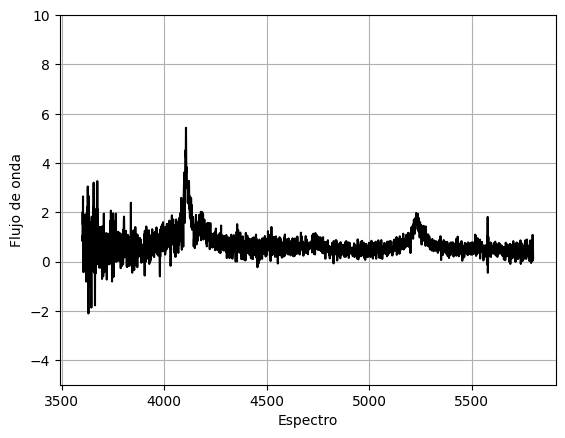

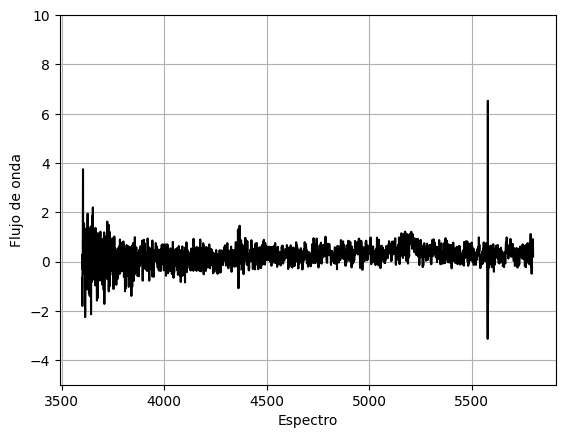

In [ ]:
#Lets plot the first 10 spectra
for i in range(28,30):
  plt.plot(bwave,bflux[i],'k')
  plt.xlabel('Espectro')
  plt.ylabel('Flujo de onda')
  plt.ylim(-5,10)
  plt.grid()
  plt.show()

Ejercicio: Utilice el análisis PCA para encontrar los componentes principales que corresponden al espectro que tenemos. Hágalo primero para los espectros en un solo archivo, luego combine los datos de diferentes archivos y vuelva a realizar el PCA.

In [ ]:
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/DESI_EDR/DESI_EDR/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

Ejercicio: Ahora que puedes convertir los espectros al sistema en reposo, crea una matriz de longitudes de onda en el sistema en reposo que sea común para todos los espectros e interpola los espectros en dicha matriz. Para que todos sus espectros tengan la misma matriz de longitud de onda que antes y pueda aplicar ahora el análisis PCA.

